In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
kFold = StratifiedKFold(n_splits=5)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.shape

(9578, 14)

In [6]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [7]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [8]:
df['purpose'] = LabelEncoder().fit_transform(df['purpose'])
df['purpose'].value_counts()

purpose
2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: count, dtype: int64

In [9]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

Text(0.5, 0, 'FICO')

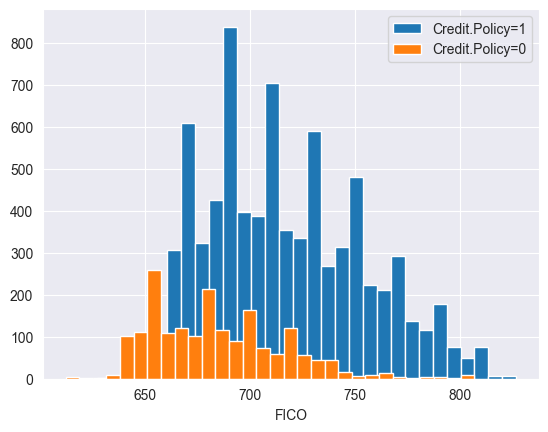

In [10]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy'] == 1], bins = 30, label = 'Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy'] == 0], bins = 30, label = 'Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

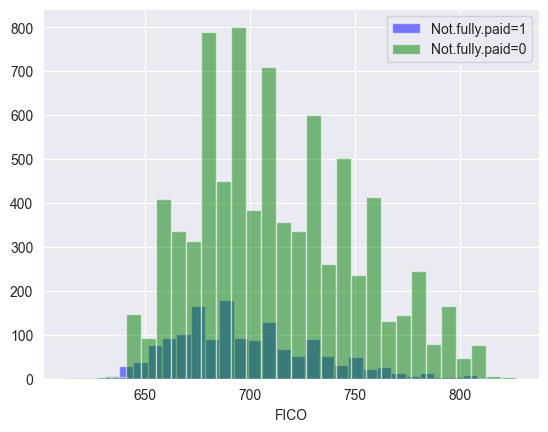

In [11]:
plt.hist(df['fico'].loc[df['not.fully.paid'] == 1], alpha = 0.5, color = 'blue', bins = 30, label = 'Not.fully.paid=1')
plt.hist(df['fico'].loc[df['not.fully.paid'] == 0], alpha = 0.5, color = 'green', bins = 30, label = "Not.fully.paid=0")
plt.legend()
plt.xlabel('FICO')

<Figure size 1000x600 with 0 Axes>

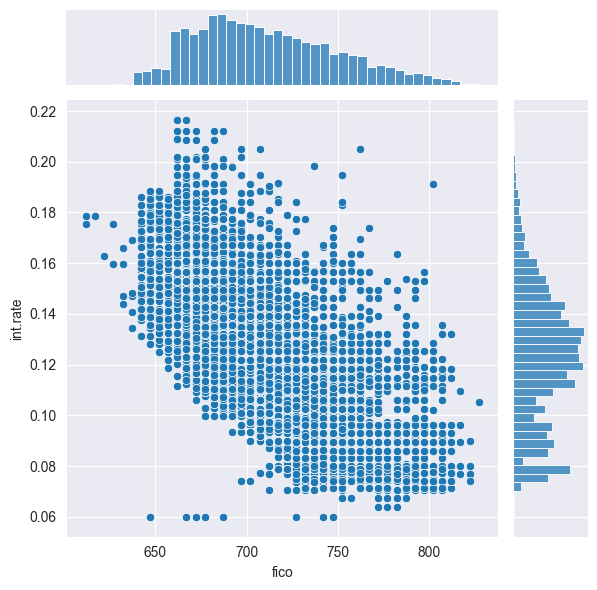

In [12]:
plt.figure(figsize = (10, 6))
sns.jointplot(x = 'fico', y = 'int.rate', data = df)

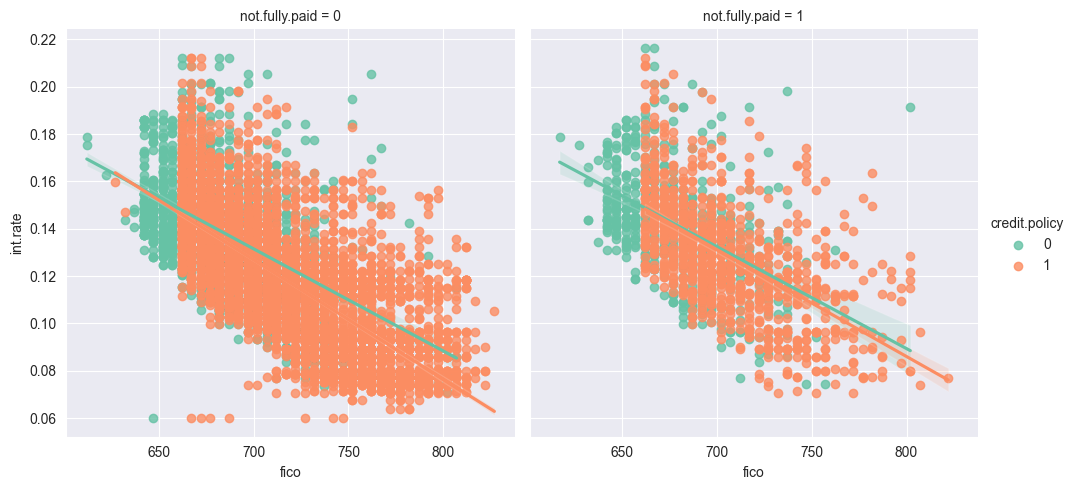

In [13]:
sns.lmplot(data = df, x = 'fico', y = 'int.rate', hue = 'credit.policy', col = 'not.fully.paid', palette = 'Set2')

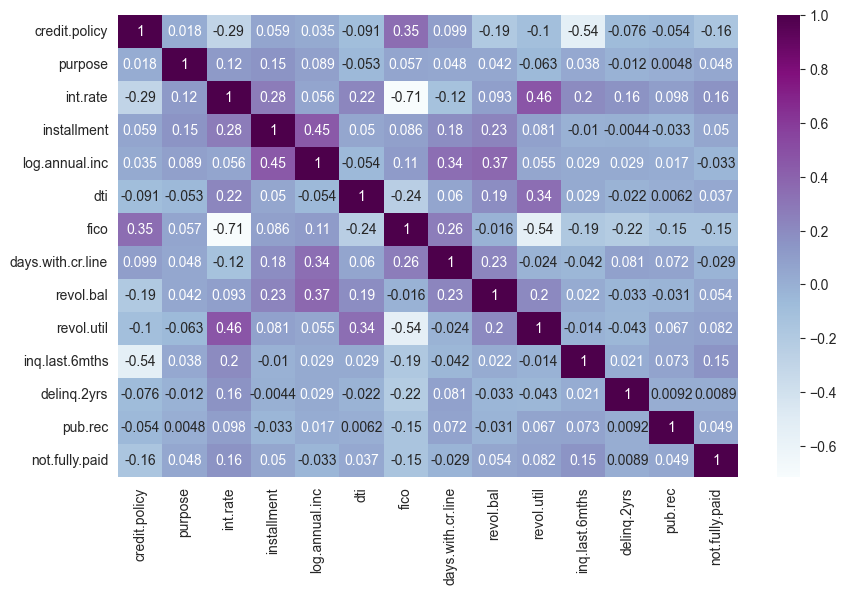

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap = 'BuPu', annot = True, )
plt.show()

In [15]:
X = df.drop('not.fully.paid', axis = 1)
y = df['not.fully.paid']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

param_grid = {'max_depth':list(range(2, 21))}
grid_search = GridSearchCV(dt_clf, param_grid=param_grid, cv = kFold, scoring='recall', return_train_score=True)
grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo...shuffle=False)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : th

In [18]:
best_tree = grid_search.best_estimator_

y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_test))
print('Classification Report: \n', classification_report(y_test, y_pred_test))
print('Weighted Recall: \n', recall_score(y_test, y_pred_test, average = 'weighted'))

Confusion Matrix: 
 [[2058  356]
 [ 358  102]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2414
           1       0.22      0.22      0.22       460

    accuracy                           0.75      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.75      0.75      2874

Weighted Recall: 
 0.7515657620041754


In [19]:
# Bagging with Decision Trees
from sklearn.model_selection import cross_val_score
bag_dt = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 2), n_estimators=100, bootstrap = True)
score = cross_val_score(estimator=bag_dt, X = X, y=y, scoring = 'recall', cv = kFold, n_jobs = -1)
print('Cross Validation Score: ', score.mean())

Cross Validation Score:  0.2


In [20]:
# Adaboosting with Decision Trees
ada_dt = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2, class_weight='balanced'), n_estimators=100, learning_rate=0.5, random_state=42)

ada_dt.fit(X_train, y_train)
y_pred_ada_dt = ada_dt.predict(X_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_ada_dt))
print('Classification Report: \n', classification_report(y_test, y_pred_ada_dt))
print('Weighted average: ', recall_score(y_test, y_pred_ada_dt, average="weighted"))

Confusion Matrix: 
 [[2006  408]
 [ 309  151]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      2414
           1       0.27      0.33      0.30       460

    accuracy                           0.75      2874
   macro avg       0.57      0.58      0.57      2874
weighted avg       0.77      0.75      0.76      2874

Weighted average:  0.7505219206680585


In [21]:
# Random Forest Classifier
random_fc = RandomForestClassifier(n_estimators = 600, max_depth=10, class_weight='balanced', random_state=42, n_jobs=-1)
random_fc.fit(X_train, y_train)
y_pred_random_fc = random_fc.predict(X_test)


print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_random_fc))
print('Classification Report: \n', classification_report(y_test, y_pred_random_fc))
print('Weighted average: ', recall_score(y_test, y_pred_random_fc, average="weighted"))

Confusion Matrix: 
 [[2175  239]
 [ 365   95]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2414
           1       0.28      0.21      0.24       460

    accuracy                           0.79      2874
   macro avg       0.57      0.55      0.56      2874
weighted avg       0.76      0.79      0.78      2874

Weighted average:  0.789839944328462


In [22]:
grad_boost = GradientBoostingClassifier(learning_rate=0.5)

grad_boost.fit(X_train, y_train)
y_pred_grad_boost = grad_boost.predict(X_test)


print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_grad_boost))
print('Classification Report: \n', classification_report(y_test, y_pred_grad_boost))
print('Weighted average: ', recall_score(y_test, y_pred_grad_boost, average="weighted"))

Confusion Matrix: 
 [[2300  114]
 [ 416   44]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      2414
           1       0.28      0.10      0.14       460

    accuracy                           0.82      2874
   macro avg       0.56      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874

Weighted average:  0.8155880306193458


# Final Business Insight

The dataset is imbalanced (16% defaulters).

A basic Decision Tree completely failed to detect defaulters.

Ensemble methods significantly improved minority class detection.

AdaBoost improved recall for defaulters to 33%.

Random Forest provided the best balance between recall and stability.

Gradient Boosting prioritized overall accuracy but struggled with minority recall.

## Recommendation
For financial risk modeling, maximizing recall for defaulters is more important than accuracy.
AdaBoost with class balancing is preferable over a single Decision Tree.